# Implement Troubleshooting Techniques

### Install the necessary libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Troubleshooting Mode Collapse in GANs

### Import the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model

2024-07-26 17:51:34.057017: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 17:51:34.059873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 17:51:34.068527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 17:51:34.084205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 17:51:34.091265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 17:51:34.109377: I tensorflow/core/platform/cpu_feature_gu

In [3]:
def build_generator(latent_dim):
    # Input layer with latent dimensions
    latent_input = Input(shape=(latent_dim,))
    
    ## TODO -- Add Gaussian noise to input
    noisy_latent = GaussianNoise(0.1)(latent_input)

    # Building the generator network
    x = Dense(256, activation='relu')(noisy_latent)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    generated_image = Dense(784, activation='sigmoid')(x)  # Assuming we're generating 28x28 images

    # Create model
    model = Model(inputs=latent_input, outputs=generated_image)
    return model

### Use the generator to generate and visualize images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


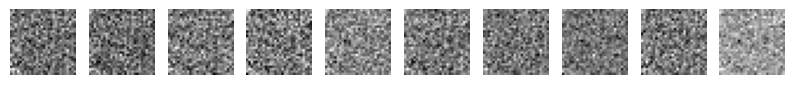

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Build the generator
latent_dim = 100  # Dimensionality of the latent space
generator = build_generator(latent_dim)
#generator.summary()

# Generate random latent vectors
num_samples = 10
random_latent_vectoers = np.random.normal(0,1,(num_samples,latent_dim))

# Generate images from the latent vectors
generated_images = generator.predict(random_latent_vectoers)

# Reshape and plot the generated images
generated_images = generated_images.reshape(num_samples,28,28)

# Plot the generated images

plt.figure(figsize=(10,2))
for i in range(num_samples):
  plt.subplot(1,num_samples,i+1)
  plt.imshow(generated_images[i], cmap="gray")
  plt.axis('off')
plt.show() 
